In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding

import colorcet as cc
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True, anote = True, margin = 12, swatch_width = 48):

    cell_width = 230
    cell_height = 30
    swatch_width = swatch_width
    margin = margin

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

        if anote:
            ax.text(swatch_start_x, y, colors[name], fontsize=10,
                    horizontalalignment='left', color = 'white',
                    verticalalignment='center')

    return fig

In [2]:
dfc = pd.read_csv('../01_extract_readout/TCGA/02_readouts_celltype.csv', index_col=0)
dfc.head()

,CANCER,Bcell_general,Memory_Bcell,Naive_Bcell,Plasma_cell,CD4_Tcell,CD8_Tcell,Memory_Tcell,Naive_Tcell,Tcell_general,...,Pancreatic,Pneumocyte,Apoptosis_pathway,IFNg_pathway,TGFb_pathway,Cytokine,Cell_proliferation,TLS,Genome_integrity,Reference
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5KT,-0.853948,-0.359383,0.230189,-0.797948,0.240306,-0.043658,-0.048390,0.058893,-0.341485,-0.142918,...,-0.101231,0.008945,0.067183,-0.037904,0.093233,-0.035511,-0.121605,0.139817,-0.125032,0.462973
TCGA-OR-A5J9,-0.854061,-0.221956,0.112477,-0.815024,0.213674,-0.140530,-0.063277,0.033839,-0.430476,-0.213720,...,0.030500,0.003747,0.064157,-0.115112,0.072321,-0.063510,-0.145776,-0.067980,-0.152064,0.462863
TCGA-OR-A5K0,-0.854023,-0.217040,0.118835,-0.820829,0.264063,-0.167273,-0.030240,-0.036775,-0.524360,-0.225605,...,0.172203,-0.030182,0.050998,-0.136406,0.010347,-0.067387,-0.079125,-0.111355,-0.135933,0.469752
TCGA-OR-A5L6,-0.853366,-0.217639,0.119298,-0.819641,0.269755,0.000847,-0.056700,0.173134,-0.318270,-0.182664,...,0.187337,0.046157,0.158754,-0.155019,-0.020419,-0.068898,-0.113288,0.005885,-0.127582,0.436030
TCGA-OR-A5LT,-0.853587,-0.218925,0.136960,-0.814137,0.298156,-0.120242,-0.055513,0.198103,-0.278759,-0.212141,...,0.190903,0.057124,0.147135,-0.156043,0.029160,-0.073269,-0.125557,-0.141437,-0.124297,0.451167


In [3]:
palette = sns.color_palette(cc.glasbey, n_colors= len(dfc.columns[1:]))
palette = pd.Series(list(palette.as_hex())).sort_values().tolist()
mycolors = dict(zip(dfc.columns[1:], palette))

In [4]:
import sys
sys.path.insert(0, '/home/was966/Research/mims-compass/')
from compass.tokenizer import CONCEPT_palette, CONCEPT
#CONCEPT_palette.pop('CANCER')

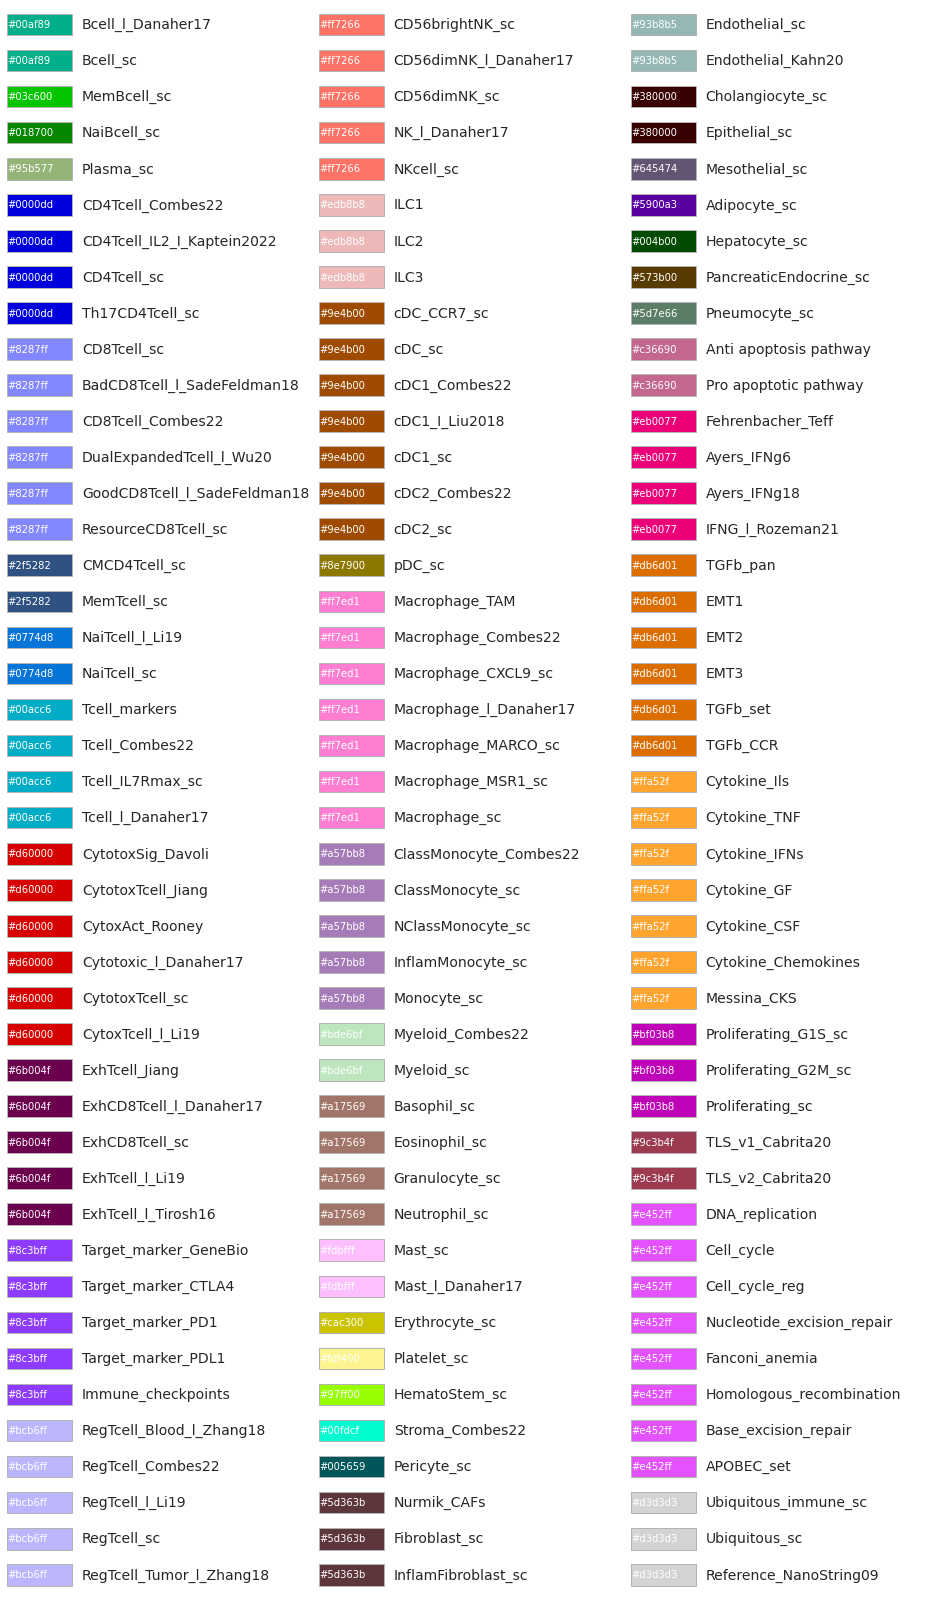

In [5]:
GENESET_palette = CONCEPT.BroadCelltypePathway.map(CONCEPT_palette).to_dict()
fig = plot_colortable(GENESET_palette, sort_colors = False, ncols=3,  margin = 150)
fig.tight_layout()
fig.savefig('color_geneset.pdf')

In [6]:
len(GENESET_palette)

132

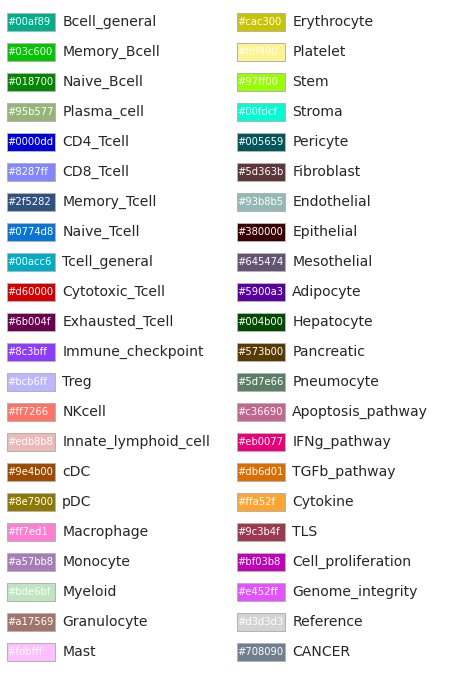

In [7]:
fig = plot_colortable(CONCEPT_palette, ncols=2, sort_colors = False)
fig.savefig('color_celltype.pdf')

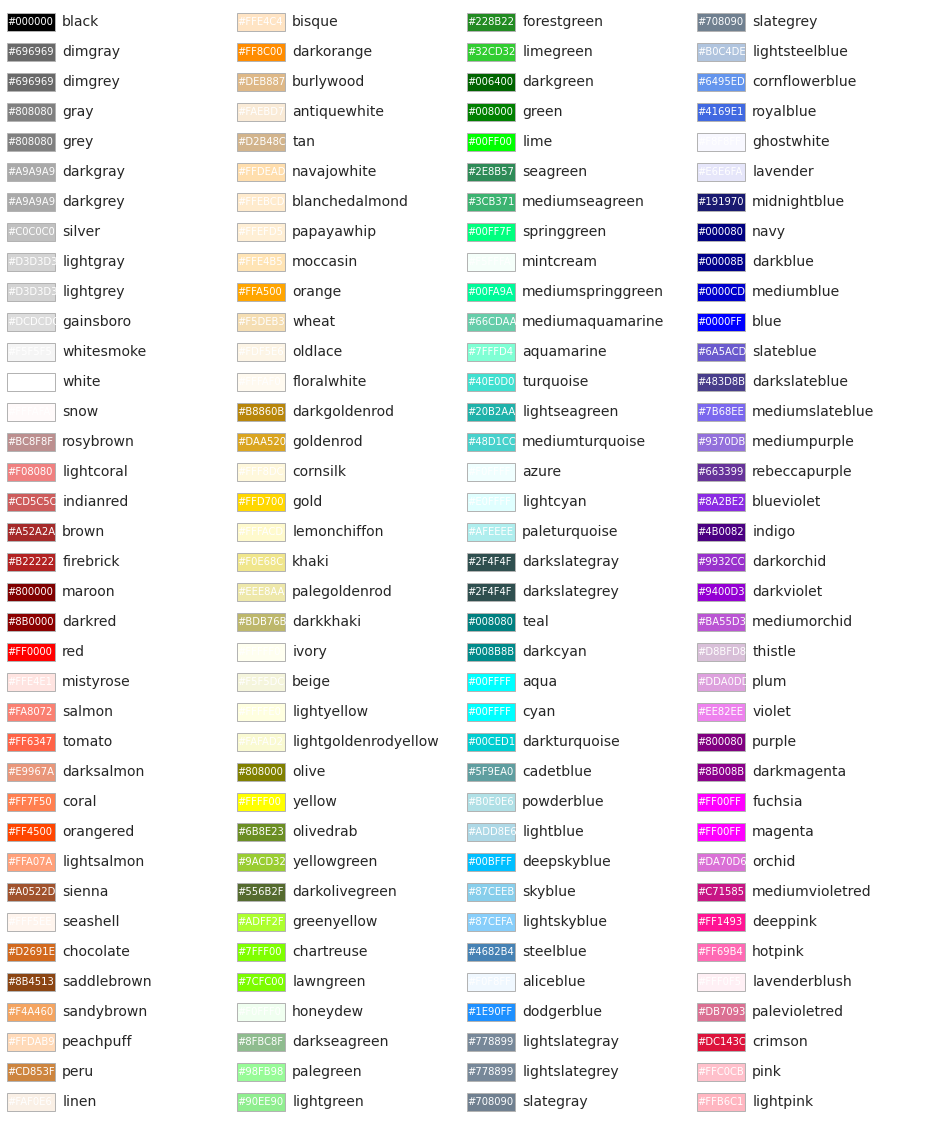

In [8]:
fig = plot_colortable(mcolors.CSS4_COLORS, sort_colors = True)
fig.savefig('color_color2pick.pdf')

In [9]:
CONCEPT['n_genes'] = CONCEPT.Genes.apply(lambda x:len(x.split(':')))
celltype_genes = CONCEPT.groupby('BroadCelltypePathway').n_genes.sum().sort_values()
celltype_genes = celltype_genes.to_frame('total_num_genes')
celltype_genesets = CONCEPT.reset_index().groupby('BroadCelltypePathway').GeneSet.size().to_frame(name = 'num_genesets')

from itertools import chain
def unique_genes(df):
    gls = df.Genes.apply(lambda x:x.split(':')).to_list()
    ugls = list(set(chain(*gls)))
    return  ':'.join(ugls)

celltype_unique_genes = CONCEPT.groupby('BroadCelltypePathway').apply(unique_genes).to_frame('unique_genes')
celltype_num = celltype_genes.join(celltype_unique_genes).join(celltype_genesets)
celltype_num['total_num_unique_genes'] = celltype_num.unique_genes.apply(lambda x:len(x.split(':')))
celltype_num.head()

,total_num_genes,unique_genes,num_genesets,total_num_unique_genes
BroadCelltypePathway,,,,
Memory_Bcell,3,AIM2:CLECL1:TNFRSF13B,1,3
Stem,4,AVP:CRHBP:NRIP1:CD34,1,4
Pericyte,5,NDUFA4L2:CSPG4:RGS5:COX4I2:SOD3,1,5
Naive_Bcell,5,CD72:FCRL1:BTLA:TCL1A:FCER2,1,5
Hepatocyte,5,ALDOB:APOC3:PCK1:TAT:APOH,1,5


In [10]:
celltype_num.to_csv('./celltype_statistic.tsv', sep='\t')

In [11]:
celltype_num

,total_num_genes,unique_genes,num_genesets,total_num_unique_genes
BroadCelltypePathway,,,,
Memory_Bcell,3,AIM2:CLECL1:TNFRSF13B,1,3
Stem,4,AVP:CRHBP:NRIP1:CD34,1,4
Pericyte,5,NDUFA4L2:CSPG4:RGS5:COX4I2:SOD3,1,5
Naive_Bcell,5,CD72:FCRL1:BTLA:TCL1A:FCER2,1,5
Hepatocyte,5,ALDOB:APOC3:PCK1:TAT:APOH,1,5
Pneumocyte,6,SPTB:AGER:CFTR:PGC:NAPSA:ABCA3,1,6
Plasma_cell,6,FCRL2:JSRP1:IGLL5:FCRL5:DERL3:TNFRSF17,1,6
Mesothelial,6,CCDC80:UPK3B:CALB2:PTGIS:PRG4:PLA2G2A,1,6
Platelet,7,PPBP:PF4:TREML1:TMEM40:GP9:ACRBP:ITGB3,1,7


In [13]:
CONCEPT['GeneSet_color'] = CONCEPT.index.map(GENESET_palette)
CONCEPT['CelltypePathway_color'] = CONCEPT.BroadCelltypePathway.map(CONCEPT_palette)
CONCEPT.to_excel('SI_concept.xlsx')